### Project Description

The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

The chemical compositions are measured as the weight percent in corresponding oxide.

Attribute Information-
1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron

11. Type of glass: (class attribute)
1- building_windows_float_processed
2- building_windows_non_float_processed
3- vehicle_windows_float_processed
4- vehicle_windows_non_float_processed (none in this database)
5- containers
6- tableware
7- headlamps

There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 

*Predict* : Type of glass

In [36]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pickle

In [2]:
# importing dataset
glass = pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv", header=None)
glass.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


The dataset here doesn't contain column names. So we will make a list of column names(from internet) and use that list as column headers. 

In [3]:
# setting the colomn names
column_names = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']
glass.columns = column_names
glass.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


This dataset contains chemical composition for different types of glasses in which only numerical values is present. The 'Type' is the target variable with values from '1' to '10' depicting different types of glasses. 

### Exploratory Data Analysis

In [4]:
# checking the shape of the dataset
glass.shape

(214, 11)

There are 214 observation with 11 different columns.

In [5]:
# checking for null values
glass.isnull().sum()

Id      0
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

There are no null values in the dataset.

In [6]:
# checking the summary
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  Type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


There are 2 different types of data(int64, float64) present.

In [7]:
glass.describe()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


We can conclude the following points fron above statistics--
1. Count is same for all, meaning there is no null value present.
2. We can see there is a considerable difference between the 75 percentile value and the max value for 'Na', 'Al','K','Ca','Ba' and 'Fe' attributes which means there are outliers present.

In [8]:
# lets check for number of unique values in each columns
glass.nunique()

Id      214
RI      178
Na      142
Mg       94
Al      118
Si      133
K        65
Ca      143
Ba       34
Fe       32
Type      6
dtype: int64

These are the unique values in dataset. The 'Id' column contains the unique Id number for each sample of glass, which can be dropped.

In [9]:
# dropping the ID column
glass.drop(['Id'], axis=1, inplace =True)
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [10]:
# checking the target variable, 'Type' column
glass['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

The 'Type' attribute is the target varible, which contains the following values--
1. building_windows_float_processed
2.  building_windows_non_float_processed
3. vehicle_windows_float_processed
4. vehicle_windows_non_float_processed (none in this database)
5. containers
6. tableware
7. headlamps

The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7).
Based on the above code, we can say that there is not a single 'Type 4' Glass present in the dataset.


### Visualizing the Data

#### Univariate Analysis

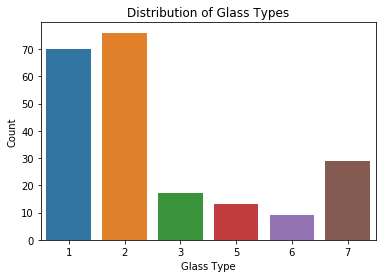

In [11]:
# plotting the target varibale
sns.countplot(data=glass, x='Type')
plt.xlabel('Glass Type')
plt.ylabel('Count')
plt.title('Distribution of Glass Types')
plt.show()

Dataset contains highest number of Type 2 glasses followed by Type 1 glasses. The number of Type 6 glasses is the minimum.
The graph also shows that the dataset is imbalanced.

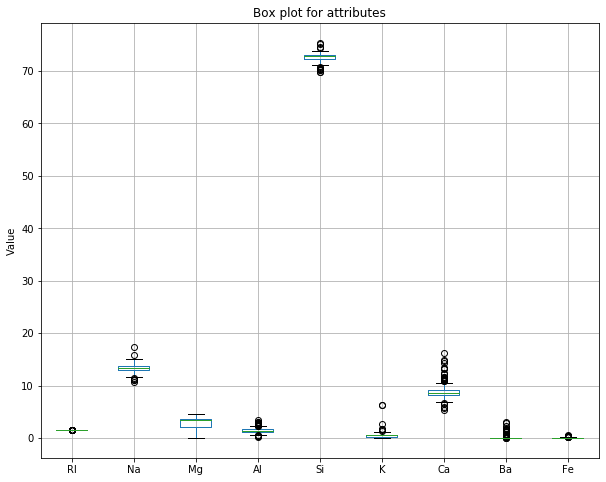

In [12]:
# creating boxplot for each attribute
plt.figure(figsize=(10,8))
glass.drop(['Type'], axis=1).boxplot()
plt.title('Box plot for attributes')
plt.ylabel('Value')
plt.show()

Si attribute has higher values as compared to others. There are many outliers present in the dataset especially the 'Ba', 'Ca','Na','Al','K' attributes.

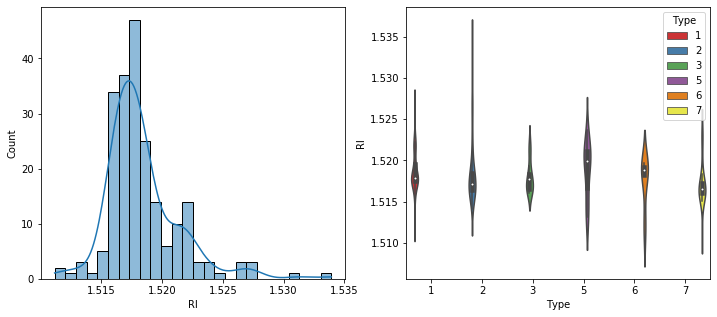

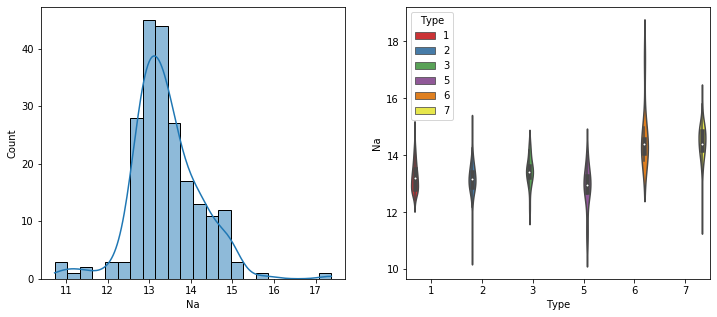

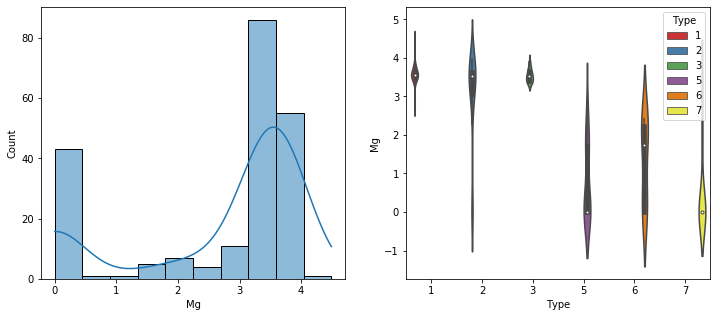

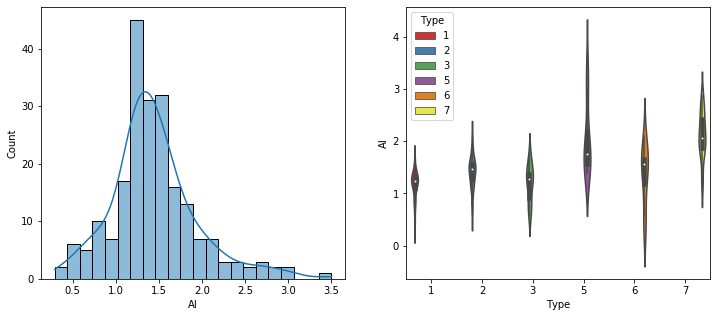

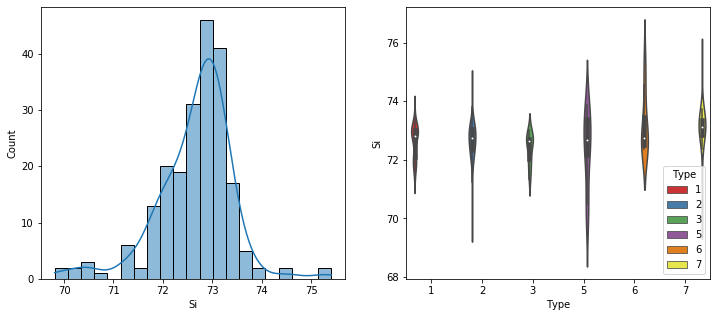

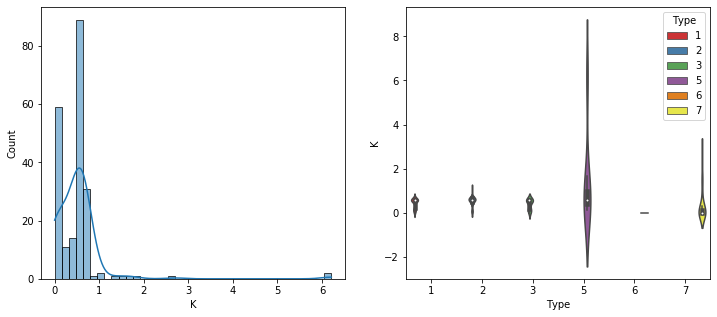

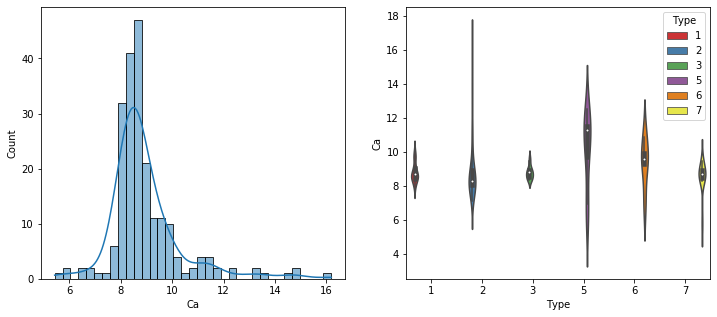

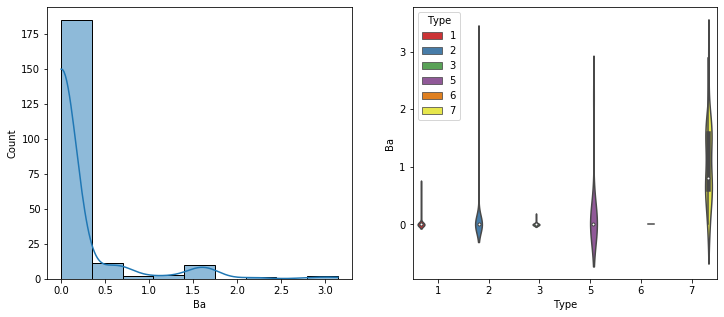

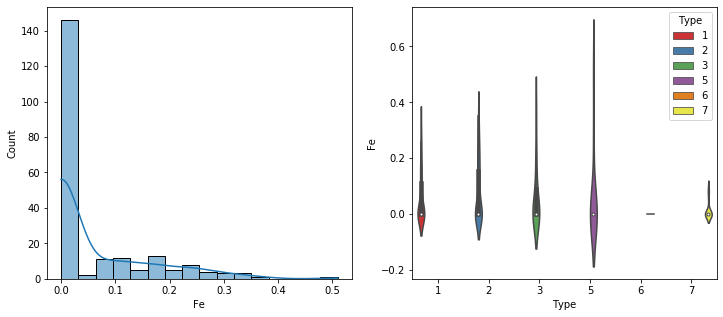

In [13]:
# plotting attributes vs type

cols = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
for i in cols:
    fig, axes = plt.subplots(figsize = (12,5), nrows = 1, ncols = 2)
    sns.histplot(glass[i], ax = axes[0], kde=True)
    sns.violinplot(data=glass, x='Type', y=i, hue='Type', palette='Set1', ax = axes[1])
    plt.show()

1. We can observe that there is not much difference between different glass types in terms of their refractive index values(all the glass types have RI values between 1.51-1.535).
2. Same goes for 'Na', 'Al','Si'.
3. If we compare the composition of 'Mg', we can say that glass type 1 and 3 have higher values as compared to other types.
4. Glass type 5 has the widest range of K composition compared to other types
5. If we compare the composition of 'Ca', 'Ba', type 1 and 3 glasses has smaller range of values while others have wider range.
6. Type 6 glasses have 0 Fe, Ba composition.
7. The histograms show that there is a slight skewness in almost all attributes.

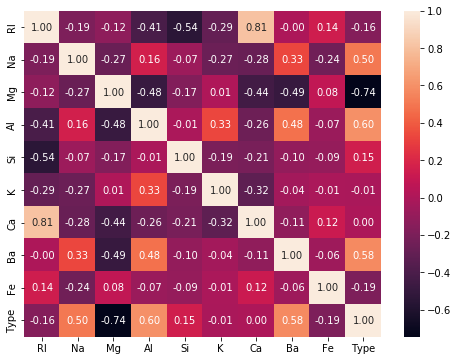

In [14]:
# checking for correlation among attributes
plt.figure(figsize=(8,6))
sns.heatmap(glass.corr(), annot=True, fmt='0.2f')

In [15]:
glass.corr()['Type'].sort_values(ascending=True)

Mg     -0.744993
Fe     -0.188278
RI     -0.164237
K      -0.010054
Ca      0.000952
Si      0.151565
Na      0.502898
Ba      0.575161
Al      0.598829
Type    1.000000
Name: Type, dtype: float64

The 'RI', 'Mg', 'K' and 'Fe' attributes have negative correlation with the target variable and 'Na', 'Al', 'Si', 'Ca', 'Ba', have positive correlation with Type(target variable).
'Ca' and 'K' have very low positive and negative corelation values respectively.
'Mg' has the highest negative correlation value while 'Al' and 'Ba' have high positive correlation values.

#### Checking for skewness and outliers

In [16]:
glass_ = glass.copy()
glass_.skew()

RI      1.625431
Na      0.454181
Mg     -1.152559
Al      0.907290
Si     -0.730447
K       6.551648
Ca      2.047054
Ba      3.416425
Fe      1.754327
Type    1.114915
dtype: float64

The acceptable default range for normal distribution is -0.5 to 0.5. Except the Na attribute, all others have skewness outside this range.

In [17]:
glass_.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [18]:
# power transformation method
cols_=['RI', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

power = 4  # Replace with the desired power
for col in cols_:
    glass_[col] = np.power(glass_[col], power)

In [19]:
# checking the skewness again
glass_.skew()

RI       1.663362
Na       0.454181
Mg      -0.219964
Al       5.045151
Si      -0.517103
K       10.260210
Ca       4.649747
Ba       9.793010
Fe      10.634137
Type     1.114915
dtype: float64

In [20]:
glass.skew()

RI      1.625431
Na      0.454181
Mg     -1.152559
Al      0.907290
Si     -0.730447
K       6.551648
Ca      2.047054
Ba      3.416425
Fe      1.754327
Type    1.114915
dtype: float64

In [21]:
# lets use the cuberot method to remove this skewness
cols_=['RI', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
for col in cols_:
    glass[col] = np.cbrt(glass[col])
    
glass.skew()

RI      1.617049
Na      0.454181
Mg     -1.440196
Al     -0.204132
Si     -0.776908
K      -0.591896
Ca      1.407358
Ba      2.073007
Fe      0.894683
Type    1.114915
dtype: float64

We have used two methods for removing the skewness. One is power transform and the other is the cuberoot method. We can see that the cube root method gives better results as compared to the power transform method.

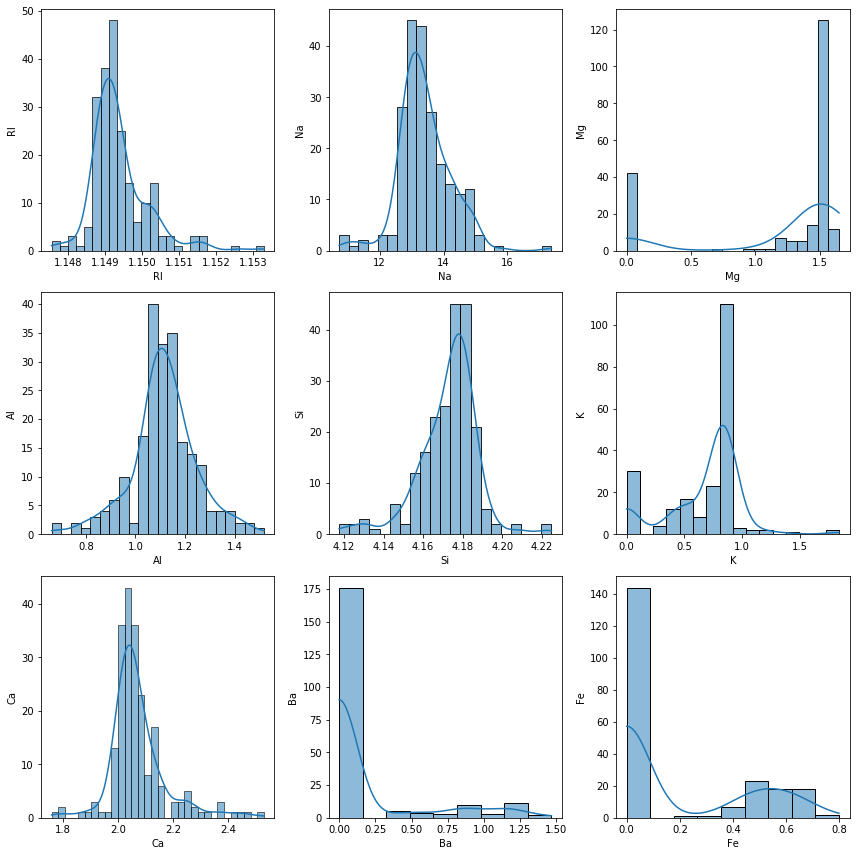

In [22]:
# lets visualize the attributes again after removing skewness 
cols = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

fig = plt.figure(figsize=(12, 12))

for i in range(len(cols)):
    ax = fig.add_subplot(3, 3, i+1)
    sns.histplot(glass[cols[i]], kde=True)
    plt.ylabel(cols[i])

plt.tight_layout()
plt.show()

In [23]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.150034,13.64,1.649740,1.032280,4.155926,0.391487,2.060643,0.0,0.0,1
1,1.149176,13.89,1.532619,1.107932,4.174180,0.782974,1.985732,0.0,0.0,1
2,1.148815,13.53,1.525490,1.154800,4.179148,0.730614,1.981496,0.0,0.0,1
3,1.149189,13.21,1.545286,1.088587,4.171883,0.829134,2.018168,0.0,0.0,1
4,1.149129,13.27,1.535452,1.074337,4.180865,0.819321,2.005816,0.0,0.0,1


In [24]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler

X = glass.drop(columns = ['Type'])
y = glass['Type']


In [25]:
# Iterate over each column in X
for col in X.columns:
    # Calculate the lower and upper thresholds for the column
    Q1 = np.percentile(X[col], 25)
    Q3 = np.percentile(X[col], 75)
    IQR = Q3 - Q1
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR

    # Replace outliers in the column with threshold values
    X[col] = np.where(X[col] < lower_threshold, lower_threshold, X[col])
    X[col] = np.where(X[col] > upper_threshold, upper_threshold, X[col])

The values in the dataset that are outside these thresholds are outliers. Since this dataset is very small, we will transform these outliers using flooring or capping method. In this method, a threshold is set and values above or below that threshold is replaced with the nearest non-outlying value, in this case the threshold.

In [26]:
# scaling the dataset
scaler = StandardScaler()
X_s = scaler.fit_transform(X)

# splitting data into train and tests set
X_train, X_test, y_train, y_test = train_test_split(X_s,y, test_size=0.30, random_state=42)

print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)

X_train shape (149, 9)
X_test shape (65, 9)
y_train shape (149,)
y_test shape (65,)


We have seen that the data in the target variable is imbalanced. We will increase the number of samples in the minority classes by replicating or generating synthetic samples. By doing so, oversampling aims to balance the class distribution and improve the model's ability to learn from the minority class. Here we will use SMOTE method for oversampling.

In [27]:
# oversampling
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_re, y_train_re = smote.fit_resample(X_train, y_train)


In [30]:
from sklearn.metrics import (confusion_matrix, classification_report,accuracy_score,f1_score,precision_score,recall_score)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB

models = [
    ('KNeighbors', KNeighborsClassifier()),
    ('DecisionTree', DecisionTreeClassifier()),
    ('RandomForest', RandomForestClassifier(n_estimators=100)),
    ('AdaBoost', AdaBoostClassifier(n_estimators=100))]

scores_df = pd.DataFrame(columns=['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])

for name, model in models:
    print("Model: ", str(model))
    print("\n")
    model.fit(X_train_re, y_train_re)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))

    # Calculate the scores
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    # Add scores to the DataFrame
    scores_df = scores_df.append({'Model': name, 'Accuracy': accuracy, 'F1 Score': f1, 'Precision': precision, 'Recall': recall}, ignore_index=True)

print(scores_df)


Model:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')


[[12  2  5  0  0  0]
 [ 8 12  0  2  1  0]
 [ 2  0  2  0  0  0]
 [ 0  0  0  6  0  0]
 [ 0  0  0  0  3  0]
 [ 0  1  0  0  1  8]]
              precision    recall  f1-score   support

           1       0.55      0.63      0.59        19
           2       0.80      0.52      0.63        23
           3       0.29      0.50      0.36         4
           5       0.75      1.00      0.86         6
           6       0.60      1.00      0.75         3
           7       1.00      0.80      0.89        10

   micro avg       0.66      0.66      0.66        65
   macro avg       0.66      0.74      0.68        65
weighted avg       0.71      0.66      0.67        65

Model:  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_i

In [31]:
# checking cv score for different classifiers
for name, model in models:
    cv_score = cross_val_score(model, X_s, y, cv=5, scoring='accuracy')
    accuracy = accuracy_score(y_test, y_pred)
    print('Model :', name)
    print('cv_score :',cv_score)
    print('Mean Score', cv_score.mean())
    print("Difference between accuracy and cv score is: ", accuracy-cv_score.mean())
    print("\n")

Model : KNeighbors
cv_score : [0.57777778 0.79545455 0.55813953 0.69047619 0.675     ]
Mean Score 0.6593696097184468
Difference between accuracy and cv score is:  -0.10552345587229295


Model : DecisionTree
cv_score : [0.6        0.59090909 0.60465116 0.45238095 0.675     ]
Mean Score 0.5845882412161482
Difference between accuracy and cv score is:  -0.030742087369994286


Model : RandomForest
cv_score : [0.6        0.70454545 0.69767442 0.61904762 0.85      ]
Mean Score 0.694253498439545
Difference between accuracy and cv score is:  -0.1404073445933911


Model : AdaBoost
cv_score : [0.4        0.61363636 0.62790698 0.23809524 0.475     ]
Mean Score 0.47092771569515757
Difference between accuracy and cv score is:  0.08291843815099631




1. KNeighbors has a relatively high accuracy score and F1 score, with a mean CV score close to its accuracy score. However, it has a negative difference between accuracy and CV score, indicating potential inconsistency in performance.
2. DecisionTree has a higher accuracy score and F1 score compared to KNeighbors, with a smaller difference between accuracy and CV score. It also has a relatively higher precision and recall.
3. RandomForest has similar performance to DecisionTree, with a slightly higher mean CV score. However, it has a larger negative difference between accuracy and CV score.
4. AdaBoost has the lowest accuracy score, F1 score, precision, and recall. While it has the lowest mean CV score, it also has a positive difference between accuracy and CV score.

Based on these factors, DecisionTree and RandomForest exhibit better overall performance compared to KNeighbors and AdaBoost. Between DecisionTree and RandomForest, we will chose DecisionTree as it has smaller difference between accuracy and CV score.

#### Hyper parameter Tuning

In [32]:
from sklearn.model_selection import GridSearchCV
# Define the hyperparameters and their possible values for tuning
hyperparameters = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(DecisionTreeClassifier(), hyperparameters, cv=5)
grid_search.fit(X_train, y_train)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 5], 'max_features': ['sqrt', 'log2'], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [33]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [35]:
# final model
final = DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='log2', min_samples_leaf=1, min_samples_split=5)
final.fit(X_train, y_train)
final_pred = final.predict(X_test)
print("Accuracy_final :", accuracy_score(y_test,final_pred)*100)

Accuracy_final : 67.6923076923077


The final accuracy for Decision Tree Model is 67.7%

Since it is a multiclass classification, we will not plot the auc-roc curve.

In [37]:
# saving the model
import joblib
joblib.dump(final, "Glass_Identification.pkl")

['Glass_Identification.pkl']

In [38]:
# predicting on the test data with the saved model
model = joblib.load("Glass_Identification.pkl")
# prediction
prediction = model.predict(X_test)
prediction

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 1, 7, 5, 1, 2, 6, 5, 2, 1, 1, 6, 2, 7,
       7, 7, 3, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 7, 5, 2, 2, 7, 3, 7, 1, 2,
       1, 2, 2, 1, 3, 1, 1, 1, 1, 2, 1, 2, 5, 1, 5, 1, 2, 1, 1, 7, 2],
      dtype=int64)

In [39]:
pred = pd.DataFrame({'y_test': y_test, 'predicted': prediction})
pred

,y_test,predicted
9,1,1
197,7,7
66,1,1
191,7,7
117,2,2
...,...,...
5,1,2
135,2,1
56,1,1
199,7,7
